## Real Estate (Final_Datasets_property ) price analysis

## 1.Import Libraris

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.style.use('fivethirtyeight')

## 2. Load the Datset

In [2]:
mum_prop = pd.read_csv('./Datasets/Mumbai_Property.csv')

### 2.1 know more about dataset

In [3]:
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Type,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [4]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Type      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [5]:
# # Define the mapping for property age conversion
property_age_mapping = {
    "Nov-24": "0 to 1 Year",
    "Aug-24": "0 to 1 Year",
    "Within 3 months": "0 to 1 Year",
    "Mar-23": "1 to 5 Year",
    "Dec-23": "1 to 5 Year",
    "Sep-23": "1 to 5 Year"
}

# Update the "Property_Age" column based on the mapping
mum_prop["Property_Age"] = mum_prop["Property_Age"].replace(property_age_mapping)

# Verify the changes
mum_prop["Property_Age"].value_counts()


Property_Age
1 to 5 Year           893
0 to 1 Year           734
5 to 10 Year          493
10+ Year              455
Under Construction      4
undefined               1
Name: count, dtype: int64

In [6]:
mum_prop.Availability.value_counts()

Availability
Ready To Move         2565
Under Construction      15
Name: count, dtype: int64

In [7]:
mum_prop.Region.value_counts()

Region
Central Mumbai          225
Mira Road               201
Kharghar Navi-Mumbai    196
Ulwe Navi-Mumbai        174
Mumbai Thane            166
                       ... 
Nagar Andheri             1
Nagar Kandivali           1
Road Versova              1
Baug Thane                1
Satya Nagar               1
Name: count, Length: 210, dtype: int64

In [8]:
mum_prop.Region.nunique()

210

In [9]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [10]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

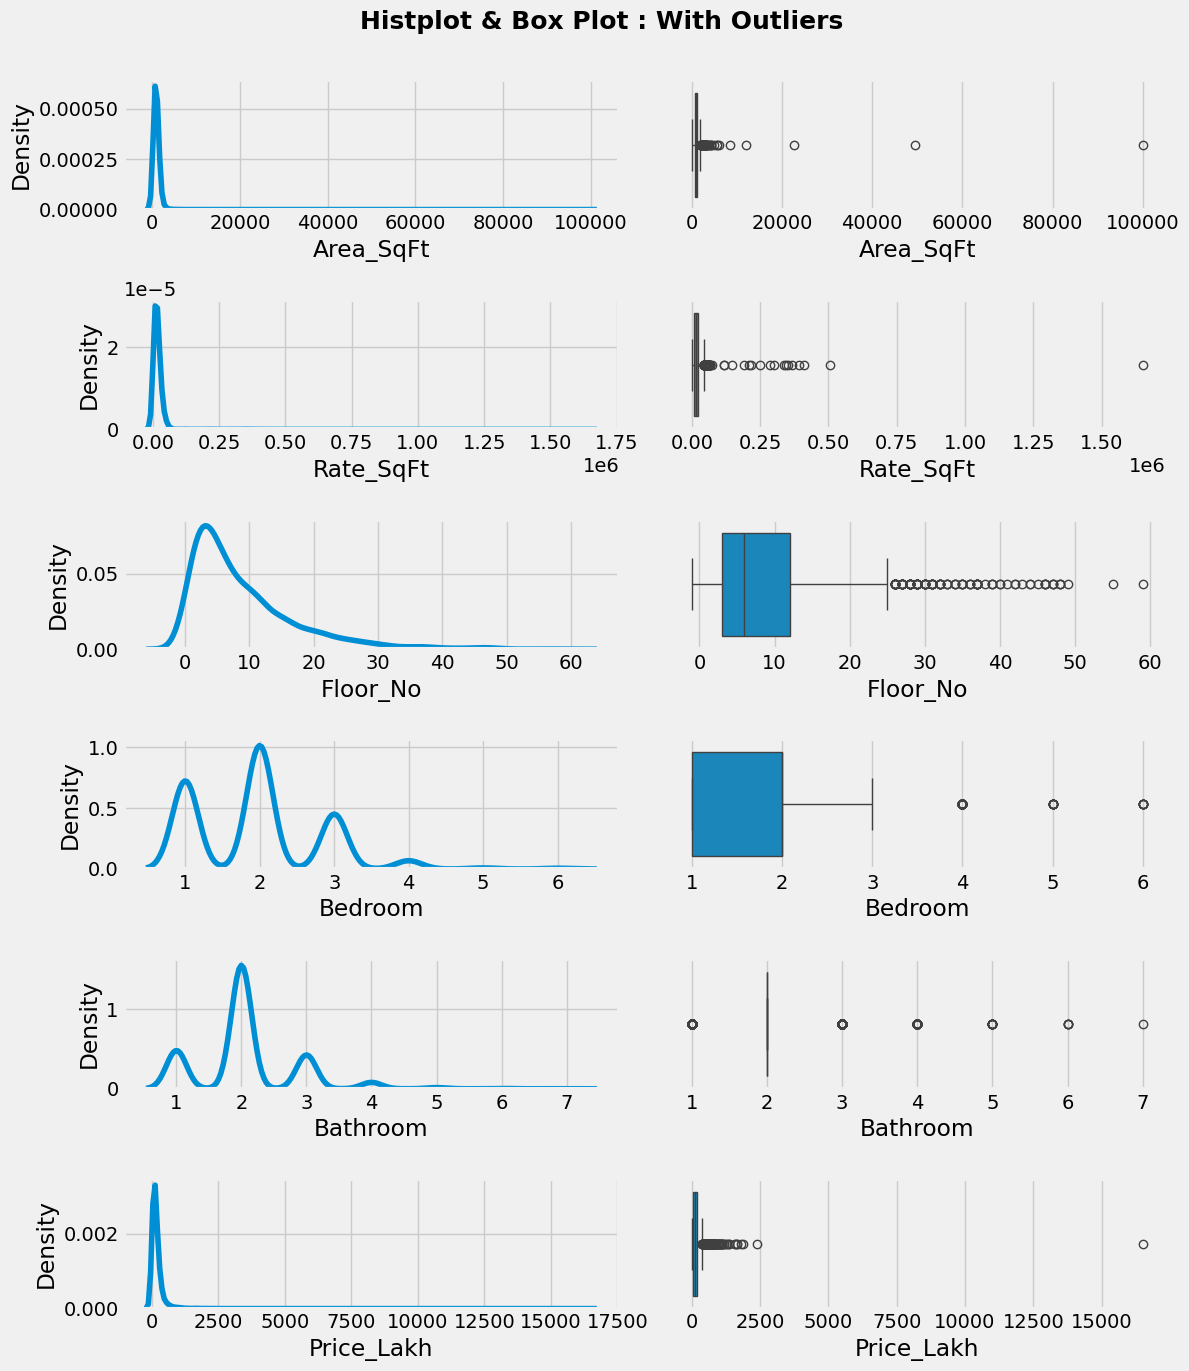

In [11]:
fig, ax = plt.subplots(6,2, figsize = (12,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = mum_prop, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = mum_prop, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = mum_prop, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = mum_prop, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = mum_prop, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = mum_prop, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = mum_prop, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = mum_prop, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = mum_prop, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = mum_prop, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = mum_prop, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = mum_prop, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Outliers', dpi = 500)

### Handled Outliers

In [12]:

def winsorize_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers to upper_bound
    df[column_name] = np.where(
        df[column_name] > upper_bound,
        upper_bound,
        df[column_name]
    )
    return df

# Apply to columns with extreme outliers (e.g., 'Area_SqFt', 'Price_Lakh','Floor_No','Rate_SqFt')
df = winsorize_outliers(mum_prop, 'Area_SqFt')
df = winsorize_outliers(mum_prop, 'Price_Lakh')
df = winsorize_outliers(mum_prop, 'Rate_SqFt')
df = winsorize_outliers(mum_prop, 'Floor_No')

In [13]:
# Q1 = np.quantile(mum_prop.Area_SqFt,0.02)
# Q3 = np.quantile(mum_prop.Area_SqFt,0.98)
# med = np.median(mum_prop.Area_SqFt)
# IQR = Q3 - Q1
# upper_bound = Q3+(1.5*IQR)
# lower_bound = Q1-(1.5*IQR)
# outliers1 = mum_prop.Area_SqFt[(mum_prop.Area_SqFt <= lower_bound) | (mum_prop.Area_SqFt >= upper_bound)]

# mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [14]:
# Q1 = np.quantile(mum_prop.Rate_SqFt,0.02)
# Q3 = np.quantile(mum_prop.Rate_SqFt,0.80)
# med = np.median(mum_prop.Rate_SqFt)
# IQR = Q3 - Q1
# upper_bound = Q3+(1.5*IQR)
# lower_bound = Q1-(1.5*IQR)
# outliers1 = mum_prop.Rate_SqFt[(mum_prop.Rate_SqFt <= lower_bound) | (mum_prop.Rate_SqFt >= upper_bound)]

# mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [15]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,929.33,16753.51,8.47,1.96,2.07,148.97
std,419.01,10252.60,6.93,0.84,0.75,107.76
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,1943.88,43437.38,25.50,6.00,7.00,399.50


In [16]:
mum_prop.duplicated().sum()

np.int64(9)

In [17]:
mum_prop = mum_prop.drop_duplicates(ignore_index=False)

In [18]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Type        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [19]:
mum_prop.shape

(2571, 12)

In [20]:
mum_prop.to_csv('./Datasets/Final_Project.csv',index_label=False)
mum_prop = pd.read_csv('./Datasets/Final_Project.csv')

## 3. Data Visualization

### 3.1 Set the rcParams for all next Visualization

In [21]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

### 3.2 Hunting Outliers

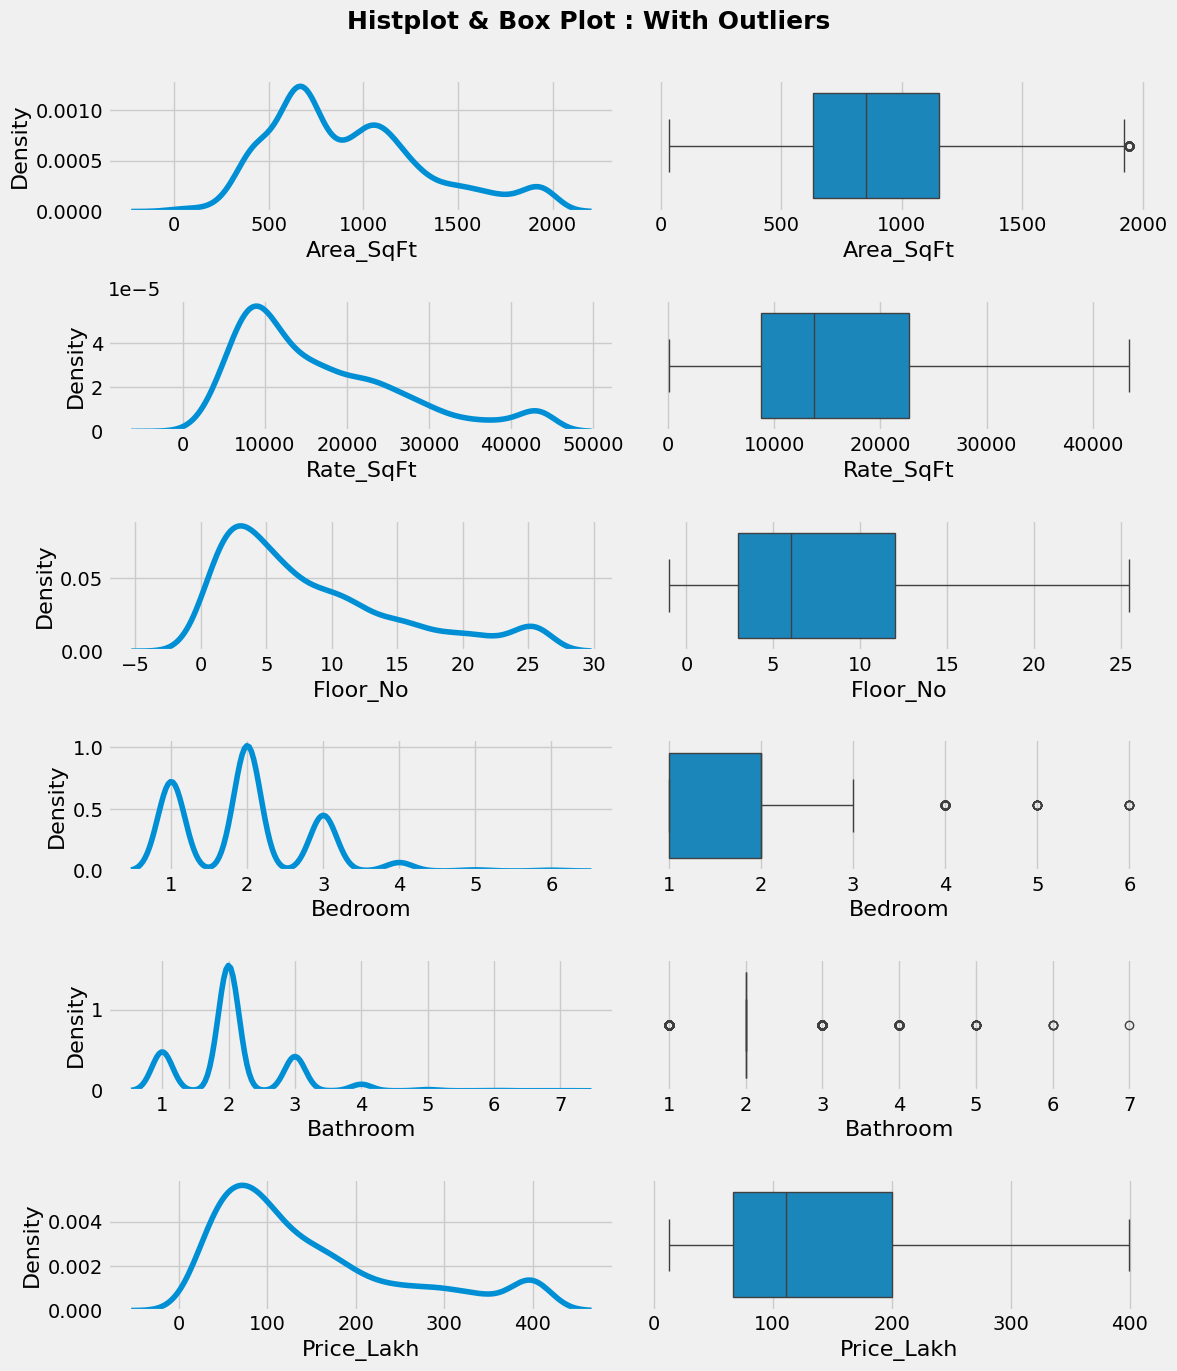

In [22]:
fig, ax = plt.subplots(6,2, figsize = (12,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = mum_prop, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = mum_prop, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = mum_prop, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = mum_prop, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = mum_prop, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = mum_prop, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = mum_prop, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = mum_prop, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = mum_prop, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = mum_prop, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = mum_prop, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = mum_prop, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Outliers', dpi = 500)

In [23]:
# mum_prop = mum_prop.drop(columns=['Unnamed: 0'], errors='ignore')


## Obeservation :


- Price_Lakh
- Area_SqFt
- Rate_SqFt
- Floor_No

## 4. Heatmap

In [24]:
%%html
<video width="100%" height="500" controls>
  <source src="correletion.mp4" type="video/mp4">
#   <source src="movie.ogg" type="video/ogg">
Your browser does not support the video tag.
</video>

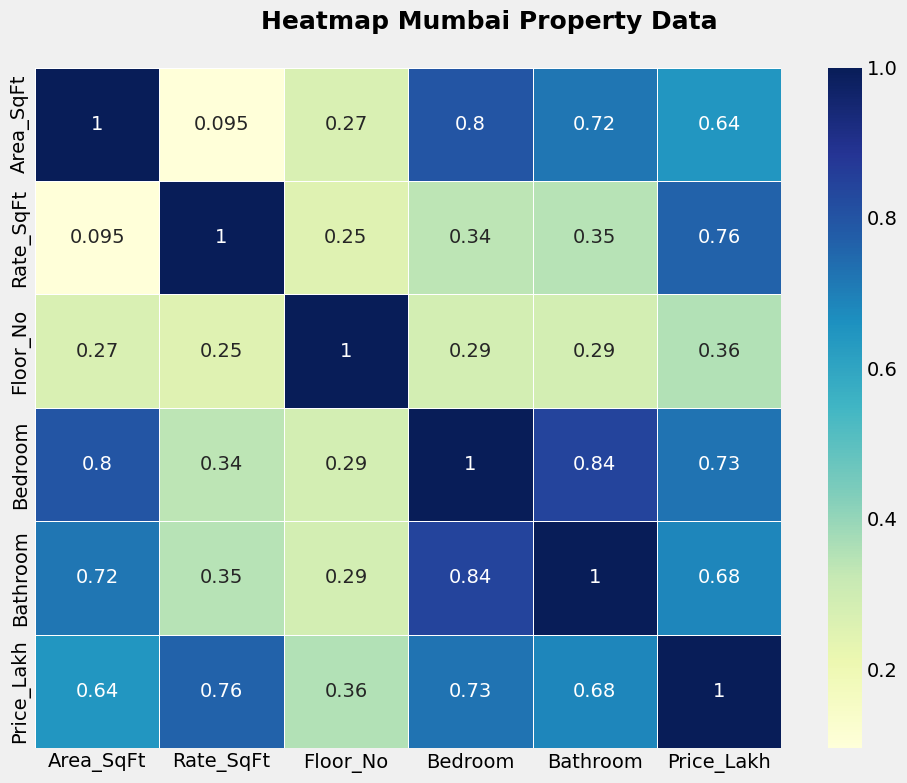

In [25]:
#Select only numeric columns
numeric_cols = mum_prop.select_dtypes(include=['number'])

# Create the heatmapx
fig = plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlGnBu', linewidth=.5)
fig.suptitle('Heatmap Mumbai Property Data', fontsize=18, fontweight="bold")

plt.tight_layout()
plt.show()

## Step 1: Sorted Correlation Table 

In [26]:
# Select only numeric columns
numeric_cols = mum_prop.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)



            Area_SqFt  Rate_SqFt  Floor_No   Bedroom  Bathroom  Price_Lakh
Area_SqFt    1.000000   0.095002  0.271483  0.795117  0.720479    0.642987
Rate_SqFt    0.095002   1.000000  0.253051  0.335683  0.348946    0.763942
Floor_No     0.271483   0.253051  1.000000  0.287331  0.287833    0.356235
Bedroom      0.795117   0.335683  0.287331  1.000000  0.841997    0.725914
Bathroom     0.720479   0.348946  0.287833  0.841997  1.000000    0.682563
Price_Lakh   0.642987   0.763942  0.356235  0.725914  0.682563    1.000000


##   Step 2: Bar Plot for Visual Comparison

## 5. Exploratory Data Analysis
    Convert all variable into following categories

    1 Binary Variables
    2 Ordinal Varibles
    3 Continous Data
    4 Target Variable

### 5.1 Checking for Binary, Oridinal, Continous Data & Target Column

In [27]:
num_columns = mum_prop.describe().columns
categorical_cols = mum_prop.describe(include= 'object').columns

In [28]:
mum_prop.nunique()

Property_Name     907
Location         1308
Region            210
Property_Age        6
Availability        2
Area_Type           4
Area_SqFt         670
Rate_SqFt        1936
Floor_No           28
Bedroom             6
Bathroom            7
Price_Lakh        385
dtype: int64

In [29]:
binary_variables = [i  for i in mum_prop.columns  if (len(mum_prop[i].unique()) == 2)]

In [30]:
binary_variables

['Availability']

In [31]:
ordinal_variables=[i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 2 ) and (len(mum_prop[i].unique()) <= 53))]

In [32]:
ordinal_variables

['Property_Age', 'Area_Type', 'Floor_No', 'Bedroom', 'Bathroom']

In [33]:
continous_variable = [i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 53))]
continous_variable = continous_variable[4:] # Remove Price and Location from data

In [34]:
continous_variable

['Rate_SqFt', 'Price_Lakh']

In [35]:
target_variable = 'Price_Lakh'

In [36]:
target_variable

'Price_Lakh'

## 6. Binary Variable

In [37]:
print(binary_variables)
print('Element in binary category :', len(binary_variables))

['Availability']
Element in binary category : 1


### 6.1 Availability Count

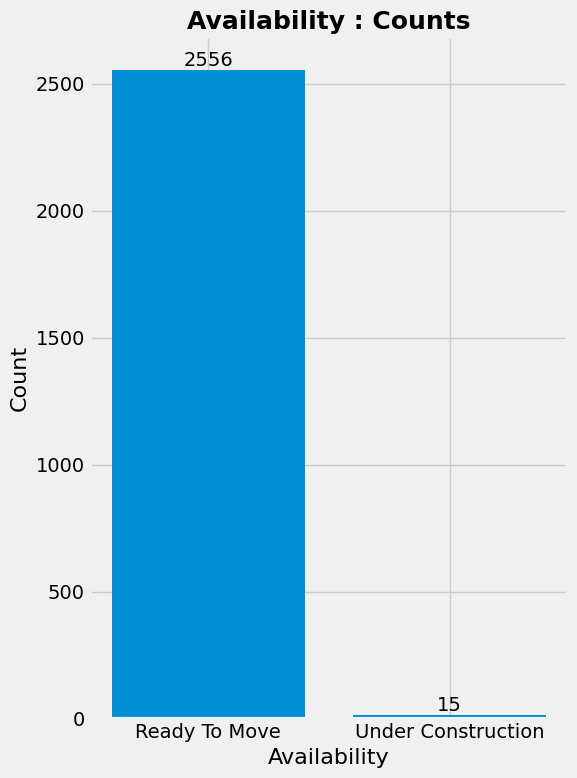

In [38]:
# Get counts of each availability type
counts = mum_prop['Availability'].value_counts()

# Create the plot
plt.figure(figsize=(6, 8))
bars = plt.bar(counts.index, counts.values)

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', 
             ha='center', va='bottom')

plt.title('Availability : Counts', fontsize=18, fontweight="bold")
plt.xlabel('Availability')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 7. Ordinal Variables

In [39]:
print(ordinal_variables)
print('Number of ordinal features is :', len(ordinal_variables))

['Property_Age', 'Area_Type', 'Floor_No', 'Bedroom', 'Bathroom']
Number of ordinal features is : 5


### 7.1 Price with respect to Property Age

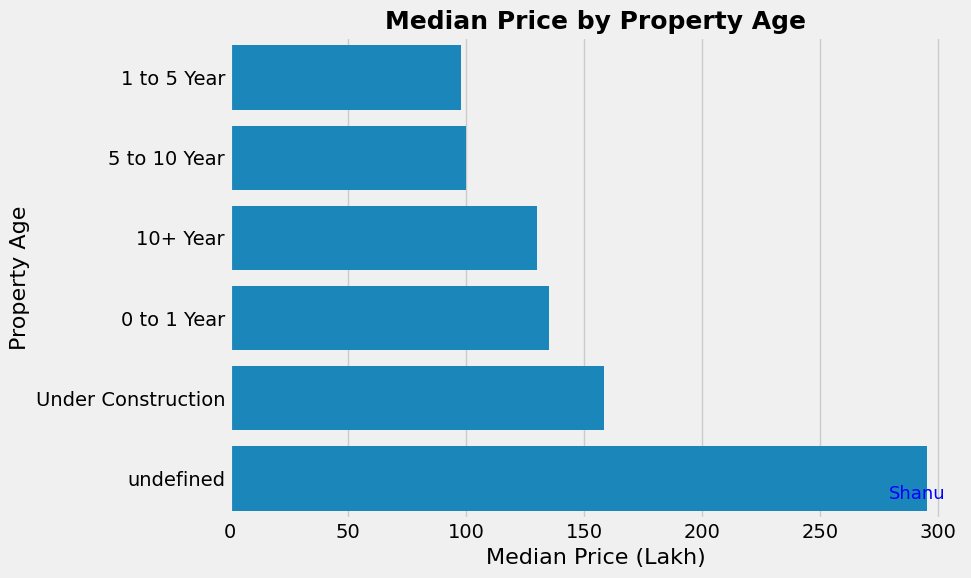

In [40]:
plt.figure(figsize=(10,6))

# Calculate median prices by property age
median_prices = mum_prop.groupby('Property_Age')['Price_Lakh'].median().sort_values()

# Create the plot
sns.barplot(x=median_prices.values, 
            y=median_prices.index,
            order=median_prices.index)  # Maintain sorted order

plt.title('Median Price by Property Age', fontsize=18, fontweight="bold")
plt.xlabel('Median Price (Lakh)')
plt.ylabel('Property Age')
plt.text(0.9, 0.15, 'Shanu', fontsize=13, color='blue', transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()

In [41]:
# # Define the mapping for property age conversion
# property_age_mapping = {
#     "Nov-24": "0 to 1 Year",
#     "Aug-24": "0 to 1 Year",
#     "Within 3 months": "0 to 1 Year",
#     "Mar-23": "1 to 5 Year",
#     "Dec-23": "1 to 5 Year",
#     "Sep-23": "1 to 5 Year"
# }

# # Update the "Property_Age" column based on the mapping
# mum_prop["Property_Age"] = mum_prop["Property_Age"].replace(property_age_mapping)

# # Verify the changes
# mum_prop["Property_Age"].value_counts()


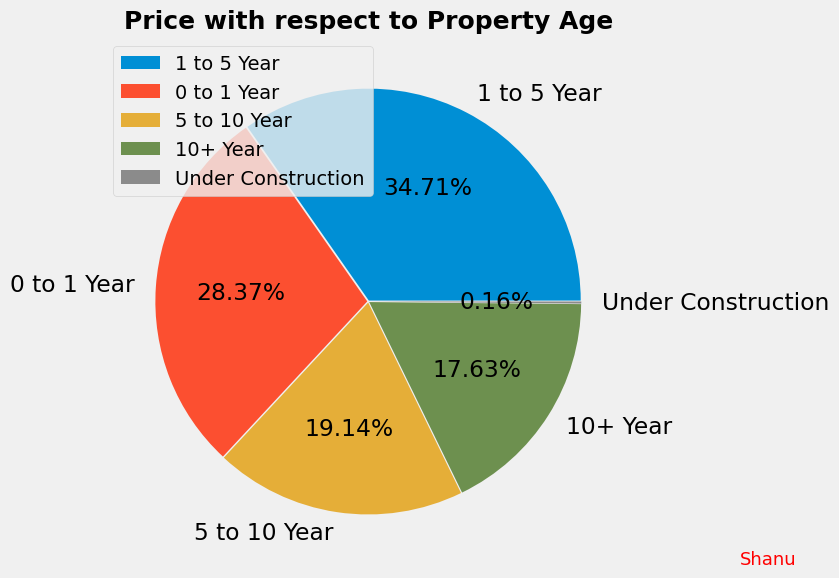

In [42]:

fig = plt.figure(figsize=(8, 8))

# Get property age counts
property_age_counts = mum_prop['Property_Age'].value_counts()

# Filter to show only the specified categories
categories_to_show = ['1 to 5 Year', '0 to 1 Year', '5 to 10 Year', '10+ Year', 'Under Construction']
filtered_counts = property_age_counts[property_age_counts.index.isin(categories_to_show)]

# Ensure labels match the filtered data
labels = filtered_counts.index.tolist()

plt.pie(filtered_counts,
        labels=labels,  
        autopct='%.2f%%',
        textprops={'size': 'large'},
        explode=[0.005] * len(labels))  

plt.legend(loc='upper left')
plt.title("Price with respect to Property Age", fontsize=18, fontweight='bold')

# Adding text
fig.text(0.9, 0.15, 'Shanu', fontsize=13, color='red')

pylab.rcParams.update(pylab.rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

plt.show()


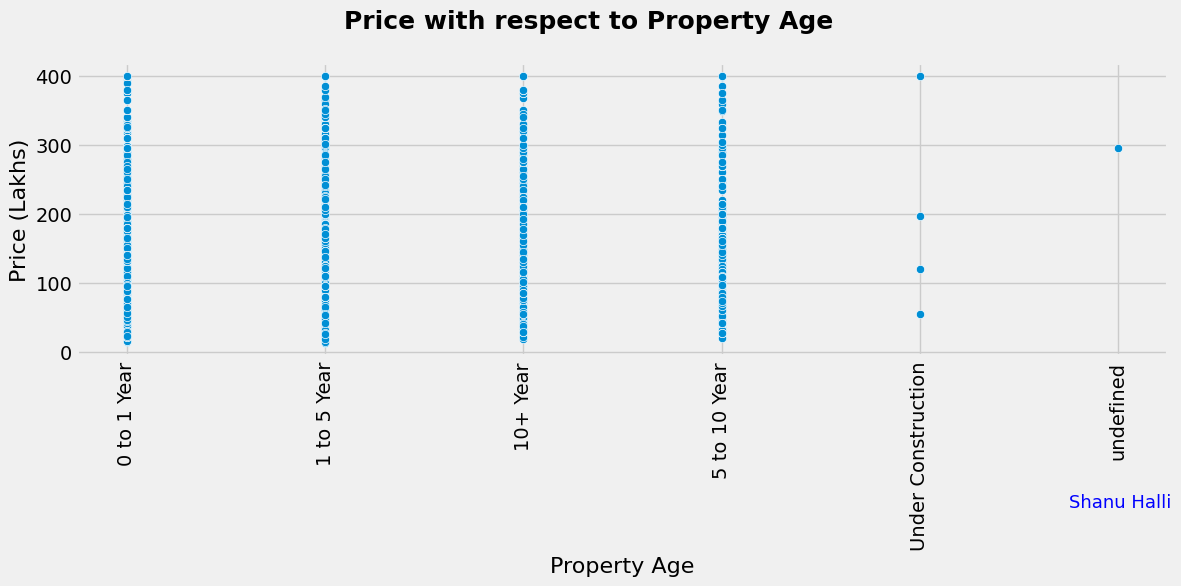

In [43]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price with respect to Property Age', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli',fontsize = 13, color ='blue')

sns.scatterplot(data = mum_prop , x = mum_prop['Property_Age'], y = mum_prop['Price_Lakh'])
plt.xlabel("Property Age", size=16)
plt.ylabel("Price (Lakhs)", size=16)
plt.xticks(rotation=90)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Age_Price_Scatter', dpi = 500)

### 7.2 Price with respect to Bed & Bath

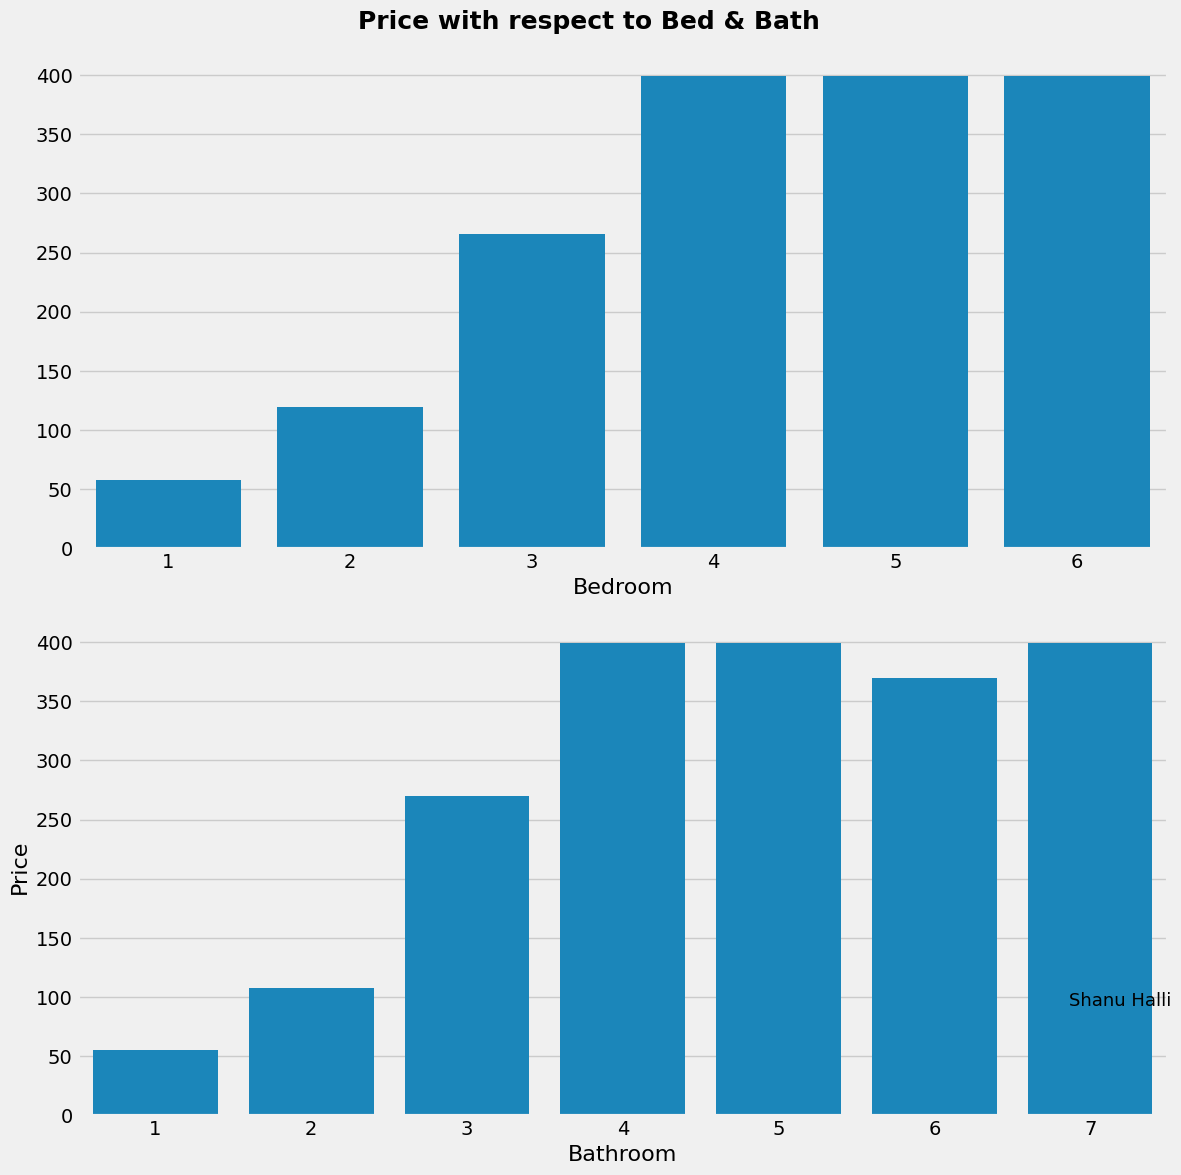

In [44]:

# Ensure Price_Lakh is numeric
mum_prop['Price_Lakh'] = pd.to_numeric(mum_prop['Price_Lakh'], errors='coerce')

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Grouping and taking median after ensuring numeric values
bedroom_median = mum_prop.groupby('Bedroom')['Price_Lakh'].median().dropna()
bathroom_median = mum_prop.groupby('Bathroom')['Price_Lakh'].median().dropna()

sns.barplot(ax=ax[0], x=bedroom_median.index, y=bedroom_median.values)
sns.barplot(ax=ax[1], x=bathroom_median.index, y=bathroom_median.values)

fig.suptitle('Price with respect to Bed & Bath', size=18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize=13, color='black')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


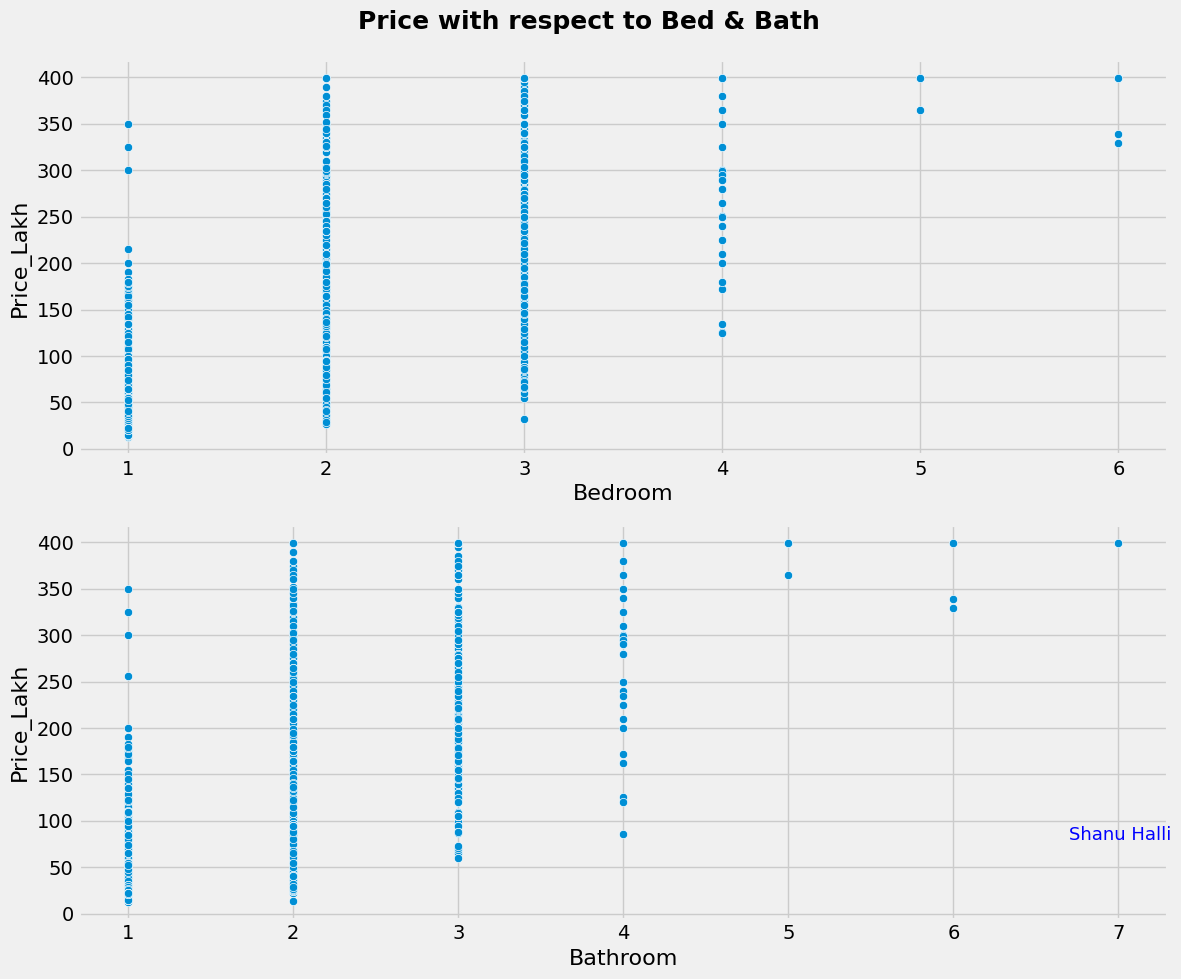

In [45]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.scatterplot(ax= ax[0], data = mum_prop , x = mum_prop['Bedroom'], y = mum_prop['Price_Lakh'])
sns.scatterplot(ax= ax[1], data = mum_prop , x = mum_prop['Bathroom'], y = mum_prop['Price_Lakh'])
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Bed_Bath_Price_Scatter', dpi = 500)

Available columns: ['Property_Name', 'Location', 'Region', 'Property_Age', 'Availability', 'Area_Type', 'Area_SqFt', 'Rate_SqFt', 'Floor_No', 'Bedroom', 'Bathroom', 'Price_Lakh']


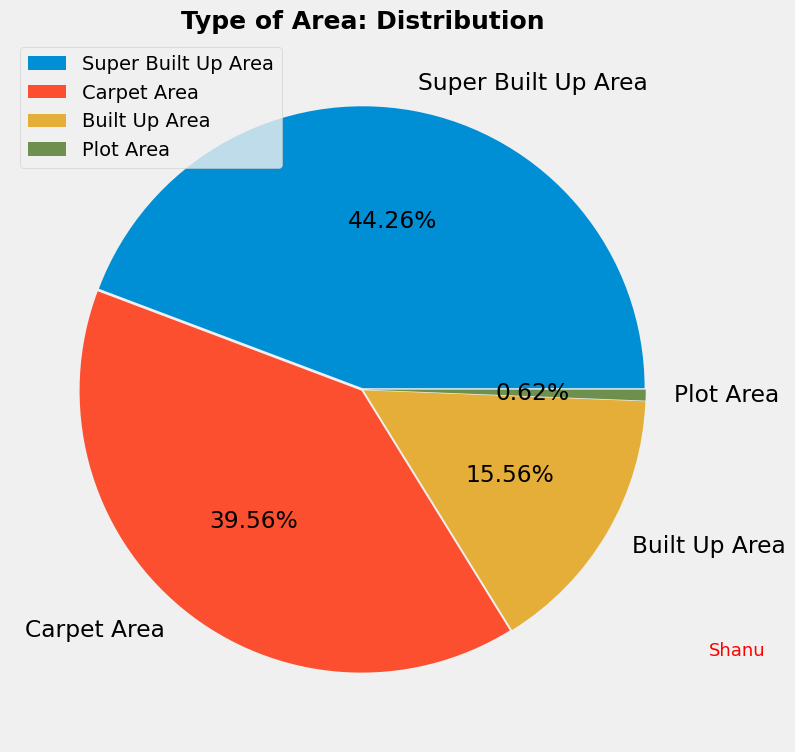

In [46]:
# First check the correct column name
print("Available columns:", mum_prop.columns.tolist())

# Use the correct column name (likely 'Area_Type')
area_counts = mum_prop['Area_Type'].value_counts()

# Create the pie chart
fig = plt.figure(figsize=(8,8))
plt.pie(area_counts,
       labels=area_counts.index,  # Use dynamic labels from data
       autopct='%.2f%%',
       textprops={'size':'large'},
       explode=[0.005]*len(area_counts))
plt.legend(loc='upper left')
plt.title("Type of Area: Distribution", fontsize=18, fontweight='bold')
fig.text(0.9, 0.15, 'Shanu', fontsize=13, color='red')
plt.tight_layout()
plt.show()

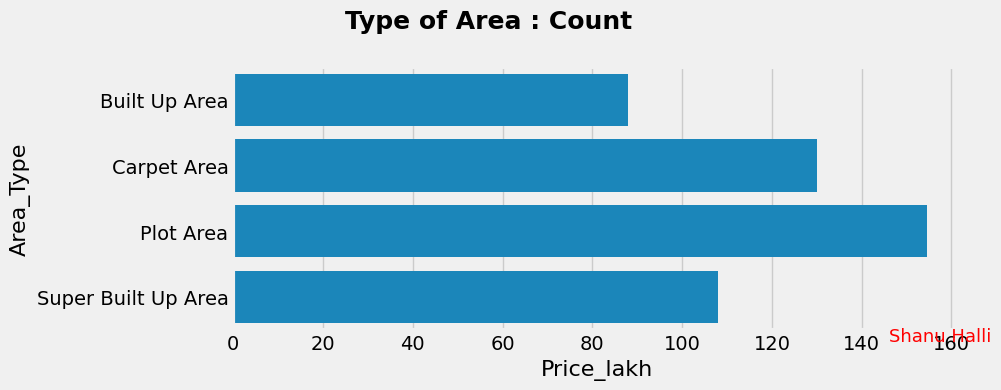

In [47]:
# Ensure Price_Lakh is numeric
mum_prop['Price_Lakh'] = pd.to_numeric(mum_prop['Price_Lakh'], errors='coerce')

fig = plt.figure(figsize=(10, 4))

# Grouping and calculating median after ensuring numeric values
area_median = mum_prop.groupby('Area_Type')['Price_Lakh'].median().dropna()

sns.barplot(x=area_median.values, y=area_median.index)

fig.suptitle('Type of Area : Count', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize=13, color='red')
plt.xlabel('Price_lakh')

plt.tight_layout()
plt.show()

### 7.4 Price with respect to Floor Numbers

C:\Users\hp\AppData\Local\Temp\ipykernel_13376\2848270578.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=floor_median.index, y=floor_median.values, palette='muted')


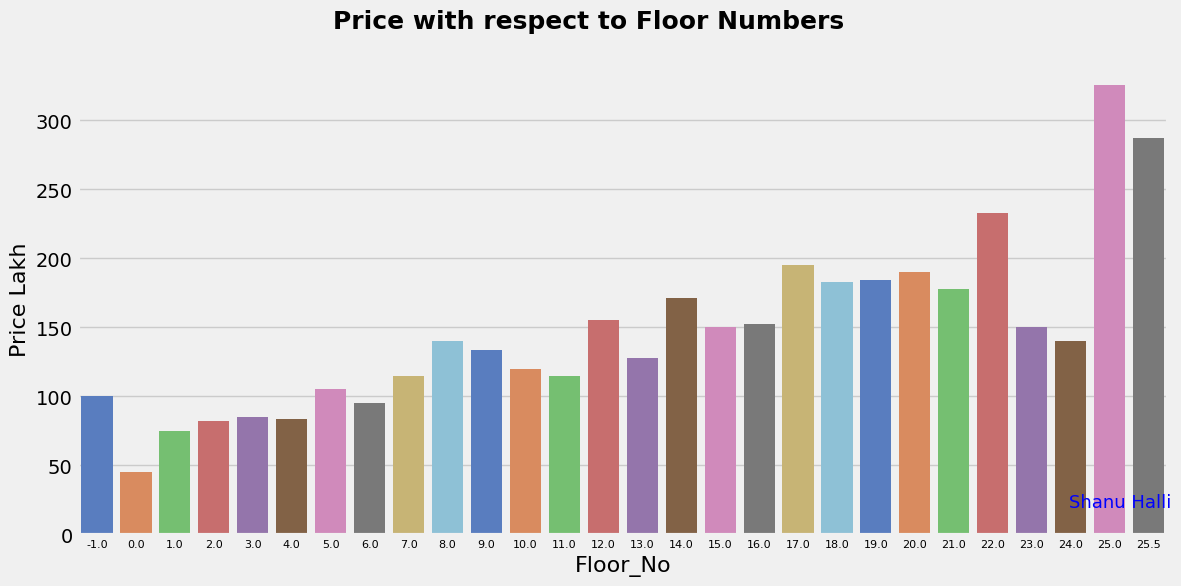

In [48]:
# Ensure 'Price_Lakh' is numeric
mum_prop['Price_Lakh'] = pd.to_numeric(mum_prop['Price_Lakh'], errors='coerce')

# Grouping and calculating median
floor_median = mum_prop.groupby('Floor_No')['Price_Lakh'].median().dropna()

fig = plt.figure(figsize=(12, 6))
params = {'xtick.labelsize': '8', 'ytick.labelsize': '14', 'axes.labelsize': '16'}
pylab.rcParams.update(params)

# Use computed median values
sns.barplot(x=floor_median.index, y=floor_median.values, palette='muted')

fig.suptitle('Price with respect to Floor Numbers', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize=13, color='blue')
plt.ylabel('Price Lakh')

fig.tight_layout()
plt.show()


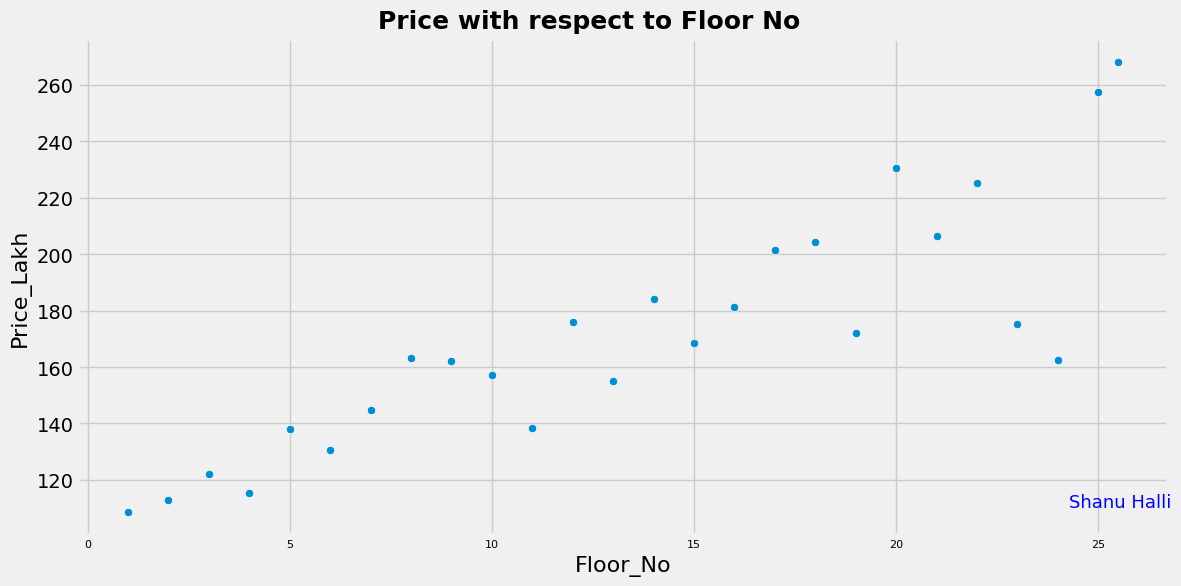

In [49]:
fig = plt.figure(figsize=(12,6))

group_full = mum_prop.groupby('Floor_No')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Floor_No'] > 0]
group = group[group['Floor_No'] < 60]

x = group['Floor_No']
y = group['Price_Lakh']
fig.suptitle('Price with respect to Floor No', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('FloorNo_Price_Scatter', dpi = 500)

### From above visualization we have concluded following points for higher Price.

   1. As number of bedroom increased price also has incresed
   2. As floor number goes higher price also increased
   3. 4 BHK and 5 BHK price higher
   4. Plot Area criteria is higher price
   5. Upcoming New Project prices are higher

## 8. Continous Variables

In [50]:
for i in continous_variable:
    print("Length of", i,":", len(mum_prop[i].unique()))

Length of Rate_SqFt : 1936
Length of Price_Lakh : 385


### 8.1 Price with respect to SqFt Area

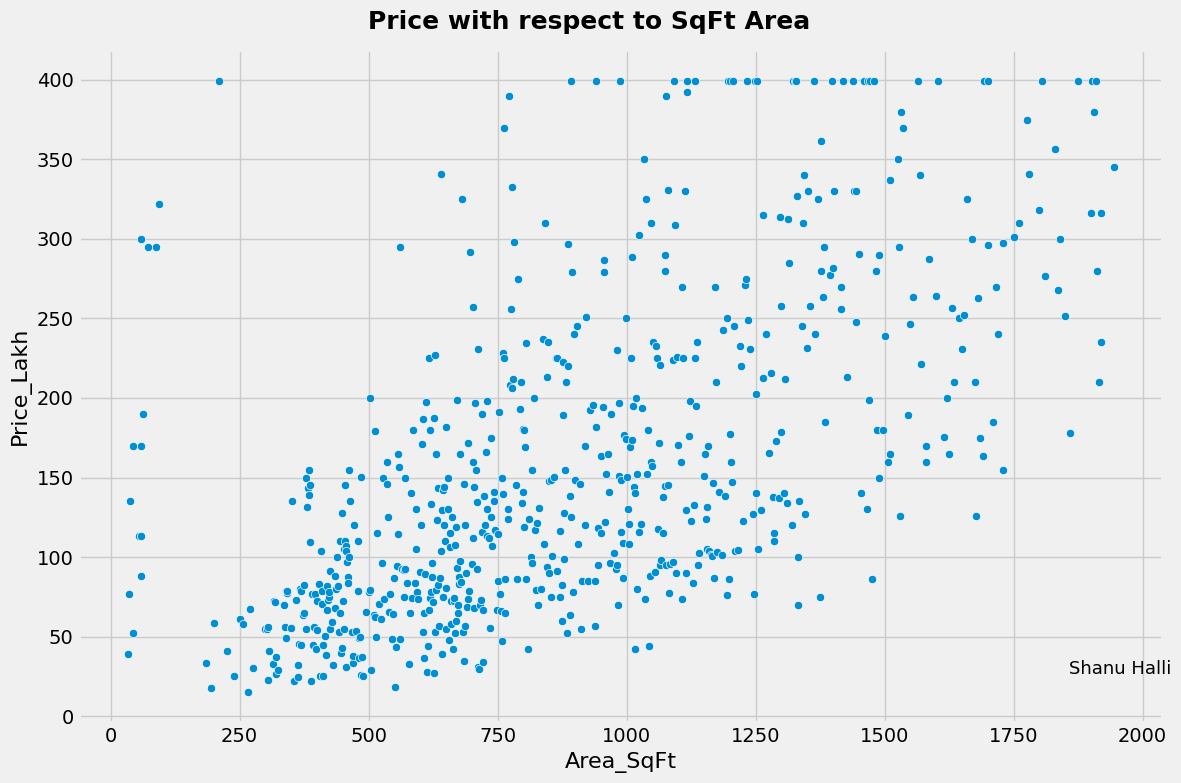

In [51]:
fig = plt.figure(figsize=(12,8))

group_full = mum_prop.groupby('Area_SqFt')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Area_SqFt'] > 0]
group = group[group['Area_SqFt'] < 2000]

x = group['Area_SqFt']
y = group['Price_Lakh']
fig.suptitle('Price with respect to SqFt Area', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='black')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('SqFt_Area_Price_Scatter', dpi = 500)

### 8.2 Data visualization for 'Rate_SqFt' for Location 'Mira Road'
**Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here**

In [52]:
# # Filter data for Mira Road
# mira_data = mum_prop[mum_prop['Region'] == "Mira Road"].copy()

# # Calculate mean and standard deviation
# mean_rate = mira_data['Rate_SqFt'].mean()
# std_rate = mira_data['Rate_SqFt'].std()

# # Define outlier bounds (using 3 standard deviations)
# lower_bound = mean_rate - 3*std_rate
# upper_bound = mean_rate + 3*std_rate

# # Filter out outliers
# mira_clean = mira_data[(mira_data['Rate_SqFt'] >= lower_bound) & 
#                       (mira_data['Rate_SqFt'] <= upper_bound)]

# # Create visualization
# plt.figure(figsize=(12,6))
# sns.histplot(mira_clean['Rate_SqFt'], bins=50, kde=True, color='royalblue')

# # Add statistical lines
# plt.axvline(mean_rate, color='red', linestyle='--', label=f'Mean: ₹{mean_rate:,.0f}/sqft')
# plt.axvline(mean_rate + std_rate, color='green', linestyle=':', label=f'+1 Std Dev')
# plt.axvline(mean_rate - std_rate, color='green', linestyle=':')

# # Formatting
# plt.title('Price per Square Feet Distribution in Mira Road (Outliers Removed)', 
#           fontsize=16, fontweight='bold')
# plt.xlabel("Price per Square Feet (₹)", fontsize=12)
# plt.ylabel("Property Count", fontsize=12)
# plt.legend()
# plt.grid(axis='y', alpha=0.3)
# plt.text(0.95, 0.15, 'Shanu Halli', transform=plt.gca().transAxes, 
#          fontsize=12, color='red', ha='right')

# plt.tight_layout()
# plt.show()

# # Optional: Show statistics
# print(f"Original data points: {len(mira_data)}")
# print(f"After outlier removal: {len(mira_clean)}")
# print(f"Outliers removed: {len(mira_data) - len(mira_clean)} ({((len(mira_data)-len(mira_clean))/len(mira_data)):.1%})")

## 9. Target Varible


In [53]:
mum_prop['Price_Cat'] = pd.cut(x = mum_prop['Price_Lakh'], bins = [13,70,190,16500], labels=['Low','Medium','High'], right = False)
mum_prop.Price_Cat.value_counts()

Price_Cat
Medium    1196
High       702
Low        673
Name: count, dtype: int64

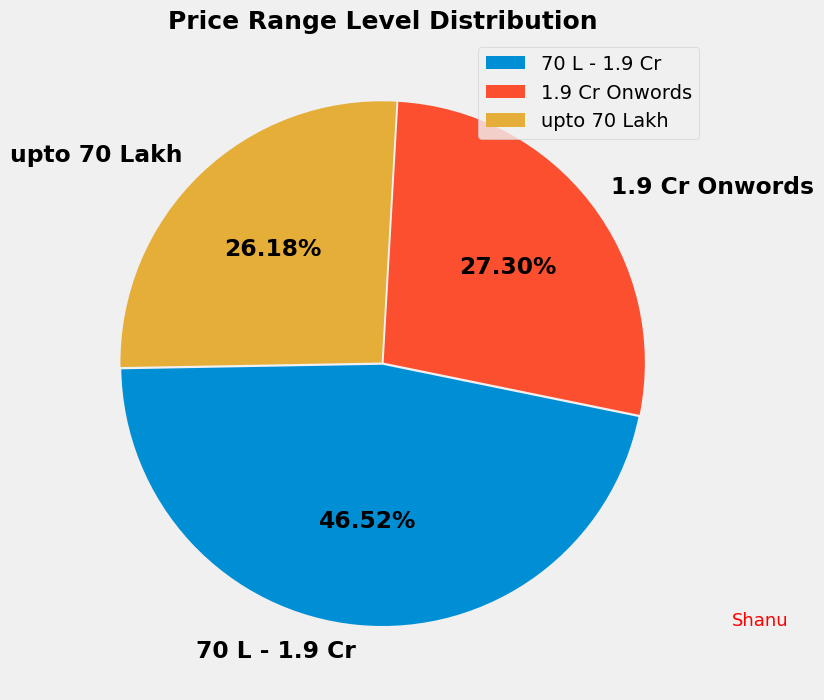

In [54]:
fig = plt.figure(figsize = (8,8))

plt.pie(mum_prop['Price_Cat'].value_counts(), labels= ['70 L - 1.9 Cr','1.9 Cr Onwords','upto 70 Lakh'],
        explode= [0.005,0.005,0.005], autopct= '%.2f%%', startangle= 181, textprops= {'size':'large','fontweight':'bold'})
plt.legend(loc= 'upper right')
plt.title("Price Range Level Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Shanu', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Range_Distribution', dpi = 500)

In [55]:
# fig, ax = plt.subplots(2,1, figsize = (12,10))

# fig.suptitle('Price with respect to Property Count', size = 18, fontweight="bold")
# fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='red')
# sns.histplot(ax= ax[0],data=mum_prop["Price_Lakh"], kde =  True, bins = 200)
# sns.boxplot(ax= ax[1], data=mum_prop["Price_Lakh"], orient="h", palette='muted')

# pylab.rcParams.update(rcParams)
# fig.tight_layout()
# fig.subplots_adjust(top=0.93)
# plt.show()

# #fig.savefig('Price_Count_Bar', dpi = 500)

## 10. Bar plot Region wise Price

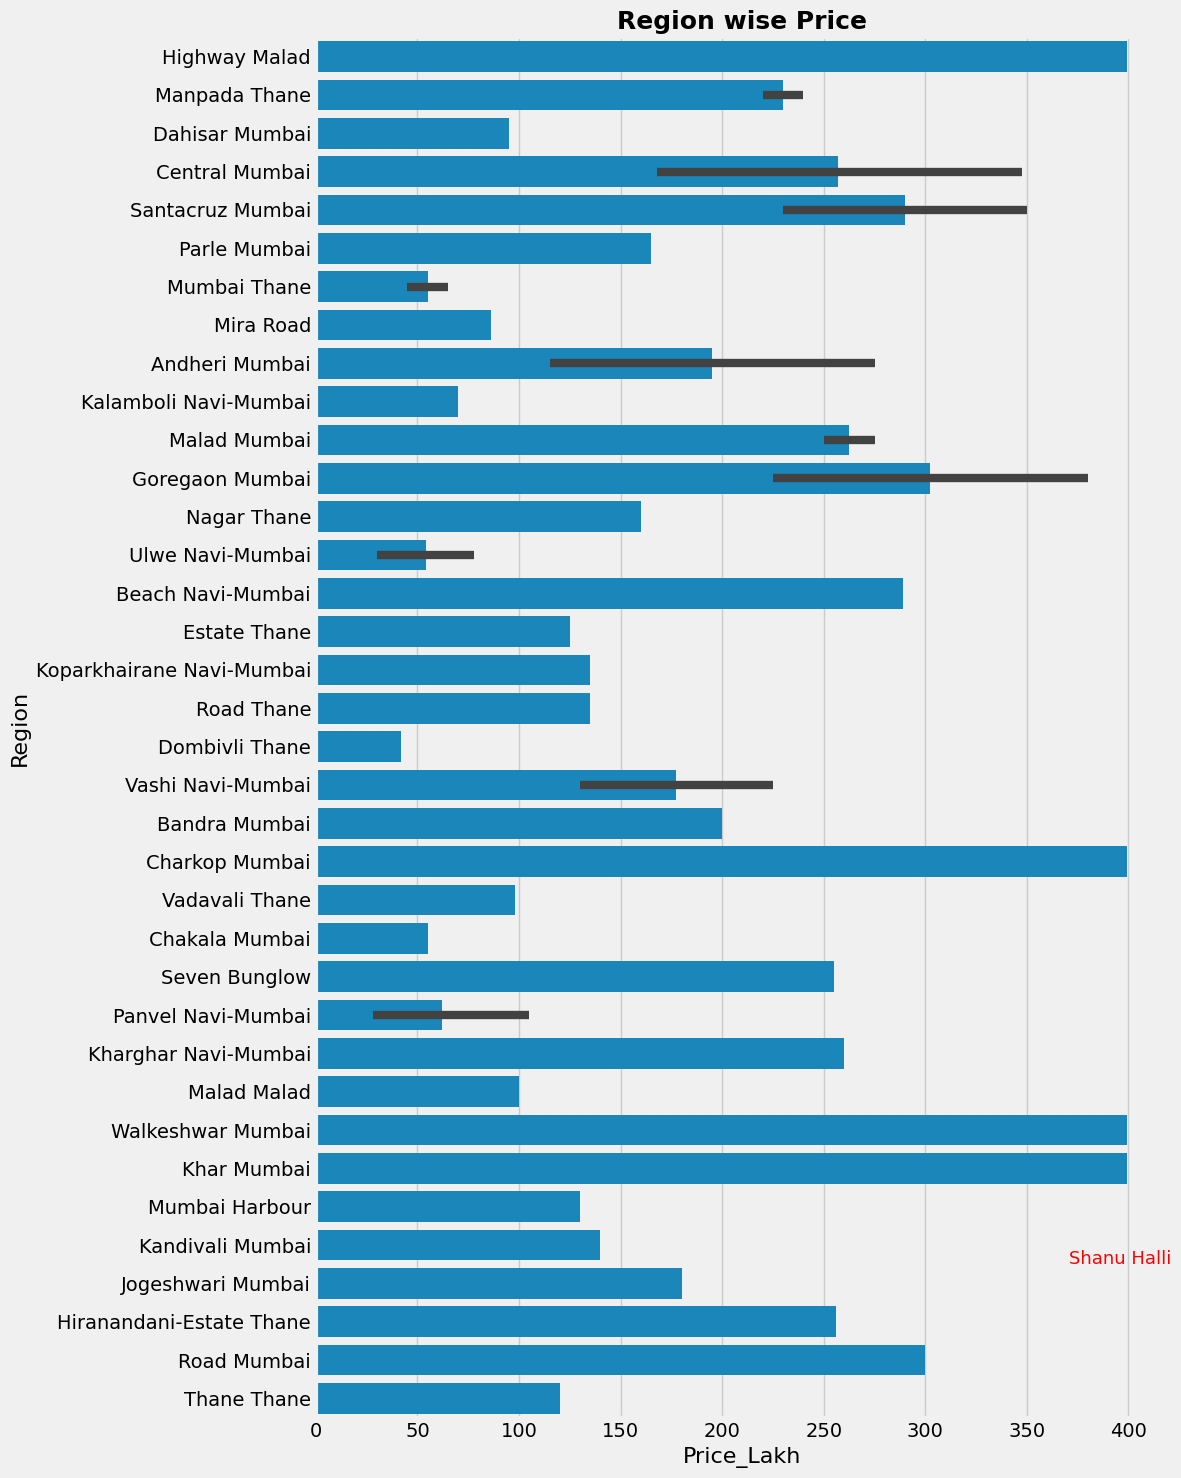

In [56]:
fig  = plt.figure(figsize=(12,15))
sns.barplot(x='Price_Lakh',y='Region',data=mum_prop.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Region_wise_Price_Bar', dpi = 500)

## 11. Check for a given Region how does the 2 BHK and 3 BHK Property Prices look like

In [57]:
mum_prop.Region.nunique()

210

In [58]:
def plot_scatter_chart1(mum_prop,Region):
    fig  = plt.figure(figsize=(10,7))
    bhk2 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==2)]
    bhk3 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==3)]
    bhk4 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==4)]
    plt.rcParams['figure.figsize'] = (14,12)
    sns.scatterplot(x=bhk2.Area_SqFt,y=bhk2.Price_Lakh,marker='p',color='blue',label='2 BHK',s=100)
    sns.scatterplot(x=bhk3.Area_SqFt,y=bhk3.Price_Lakh,marker='o',color='red',label='3 BHK',s=100)
    sns.scatterplot(x=bhk4.Area_SqFt,y=bhk4.Price_Lakh,marker='*',color='green',label='4 BHK',s=300)
    plt.xlabel("Total Square Feet Area", )
    plt.ylabel("Price (Lakhs Indian Rupees)")


    
    plt.title(Region, fontsize = 18, fontweight="bold")
    fig.text(0.9, 0.15, 'Shanu Halli', fontsize = 13, color ='blue')
    
      
    pylab.rcParams.update(rcParams)
    plt.legend(fontsize = 12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    #fig.savefig(Region, dpi = 500)

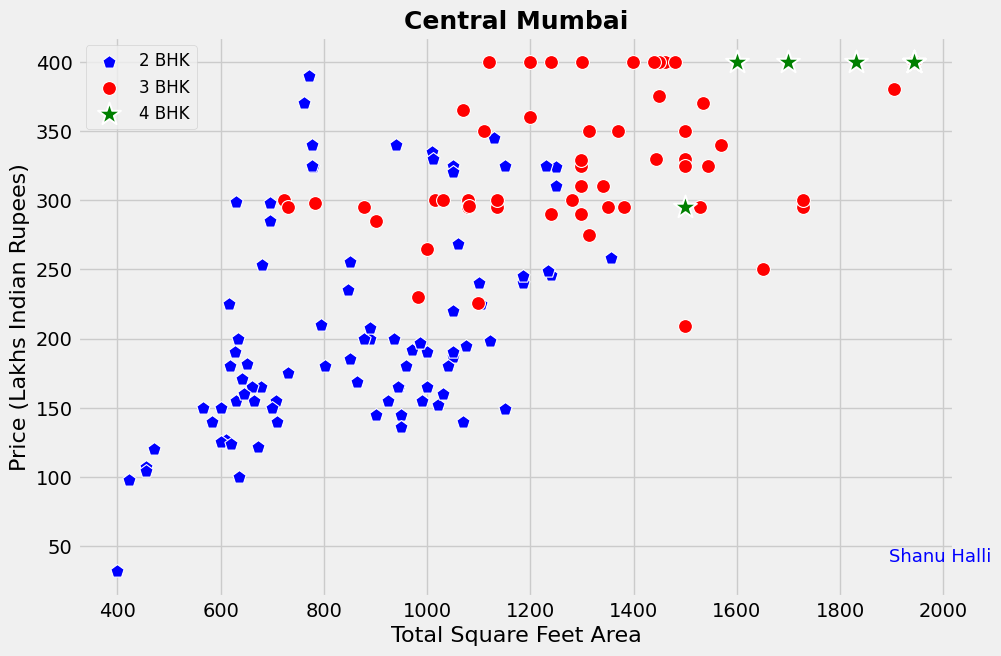

In [59]:
plot_scatter_chart1(mum_prop,"Central Mumbai")

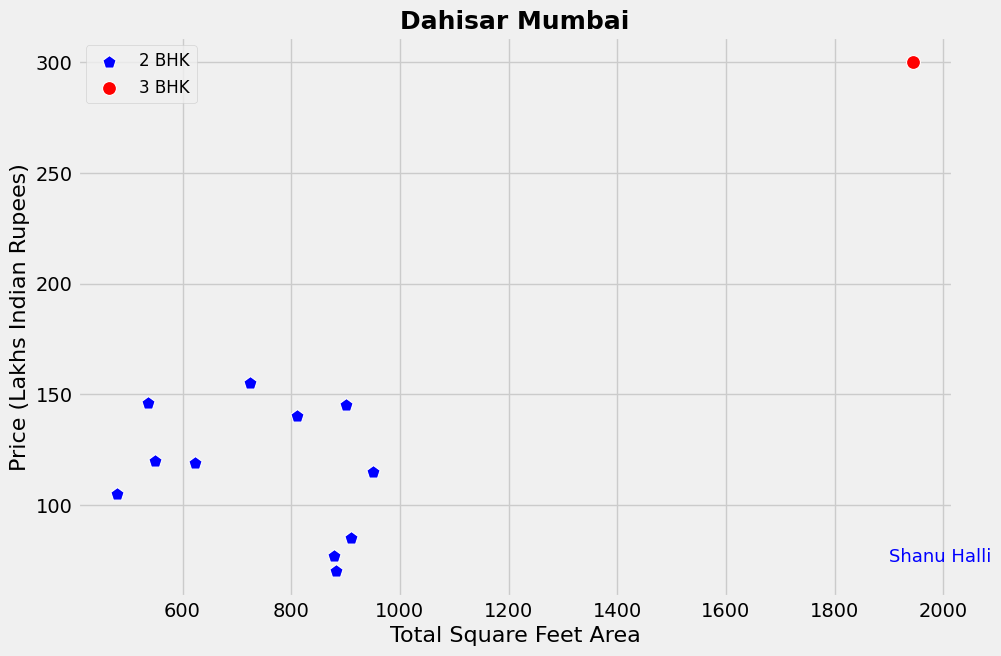

In [60]:
plot_scatter_chart1(mum_prop,"Dahisar Mumbai")

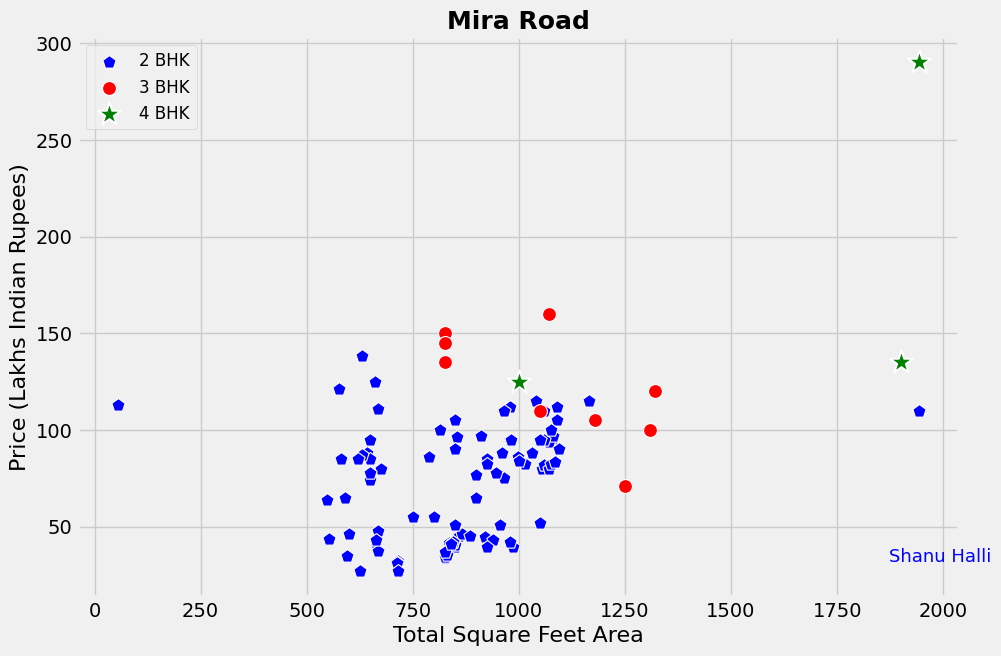

In [61]:
plot_scatter_chart1(mum_prop,"Mira Road")

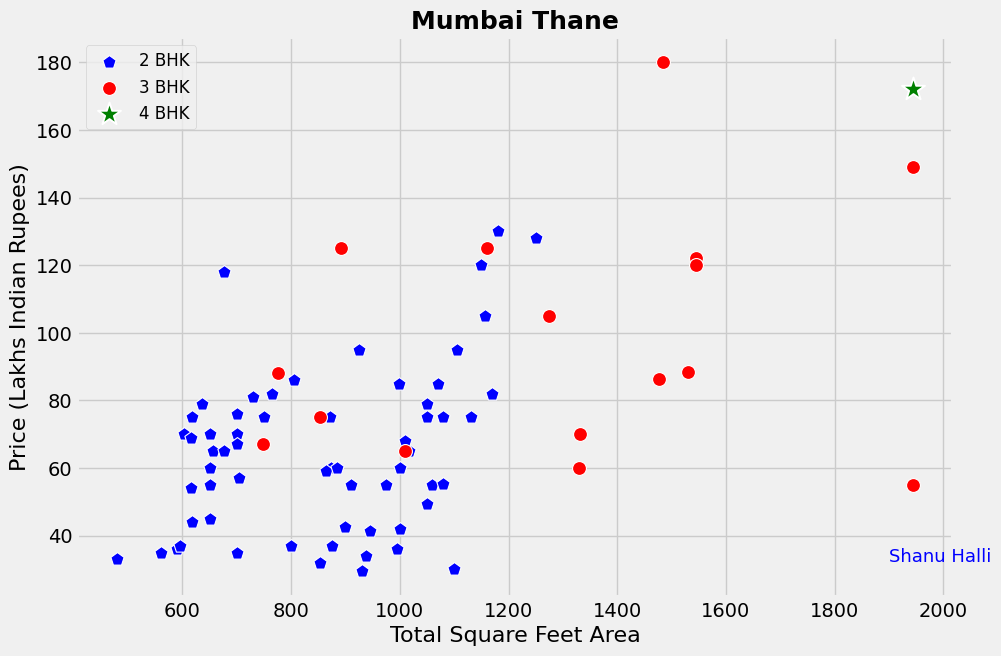

In [62]:
plot_scatter_chart1(mum_prop,"Mumbai Thane")